[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ryzhikova/python-first-part/blob/main/Task2_dmrf.ipynb)


## Table of Contents
* [Задание](#chapter1)
* [Импорт данных, общая информация](#chapter2)
* [Предобработка данных](#chapter3)
* [Исследовательский анализ данных](#chapter4)

## Задание<a class="anchor" id="chapter1"></a>
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков


## Импорт данных, общая информация<a class="anchor" id="chapter2"></a>

In [3]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [6]:
class IdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 1000
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
        self.obj_ids = []

    def get_ids(self):
        while self.offset_<10527:
            paramz = {
                'offset': self.offset_,
                'limit': self.limit_,
                'sortField':'devId.devShortCleanNm',
                'sortType':'asc',
                'objStatus':'0',
            }
            res = requests.get(self.url, params=paramz)
            objects_data = res.json()
            objects_list = objects_data.get('data').get('list')
            self.obj_ids = self.obj_ids + [x.get('objId') for x in objects_list]
            self.offset_ = self.offset_ + self.limit_
        return self.obj_ids
        
    def show_ids(self):
        # print()
        ...

In [7]:
objids = IdLoader().get_ids()

In [8]:
len(objids)

10572

In [16]:
class ObjectInfoExtractor:
    def __init__(self, ids):
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/'
        self.pkl = 'output.pkl'
        self.ids = ids
    
    def load_data(self):
        df = []
        data = pd.DataFrame()
        
        for obj in self.ids:
            res = requests.get(self.url+f'{obj}').json()
            df = pd.json_normalize(res)
            data = pd.concat([data, df])
            
        return data

In [17]:
data = ObjectInfoExtractor(objids).load_data()

In [25]:
data.to_pickle('output.pkl')

In [47]:
data = pd.read_pickle('output.pkl')

In [48]:
data.head(10)

,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,...,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,29679,124647,7424,212-2,212-2,212-2,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13391,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,36912,337586,10296,CЗ СТРОЙРЕСУРС,CЗ СТРОЙРЕСУРС,CПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК СТРОЙРЕСУРС,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,44076,275899,9115,XXI ВЕК СТРОЙ,XXI ВЕК СТРОЙ,XXI ВЕК СТРОЙ,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,23494,35375,4074,А-ЛЕКС,А-ЛЕКС,А-ЛЕКС,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,27476,94132,664,А101,А101,А101,0,1,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data.shape

(10553, 109)

## Предобработка данных<a class="anchor" id="chapter3"></a>

In [50]:
class DfPreprocessing:
    def __init__(self, df):
        self.df = df
        self.col = {'data.developer.devShortCleanNm':'developer',
                    'data.developer.regRegionDesc':'region',
                    'data.objReady100PercDt':'date',
                    'data.objElemParkingCnt':'parking',
                    'data.objSquareLiving':'living_area',
                    'data.objFlatCnt':'flats_count',
                    'data.objFloorCnt':'floors_total',
                    'data.objPriceAvg':'price'
        }
        
    def modify_col(self):
        # добавление индекса
        df = self.df.reset_index(drop=True)
        
        # удаление неимпользуемых в анализе столбцов и переименование
        df = df.filter(items=self.col.keys()).rename(columns=self.col)
        
        # удаление строк со значением 0 в столбце living_area
        df = df[df['living_area']>0].reset_index(drop=True)
        
        # удаление строк с пропусками в данных
        df = df.dropna().reset_index(drop=True)
        
        # замена типа данных в date на формат datetime
        df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%dT%H:%M:%S')
        
        # замена вещественного типа данных в столбце в floors_total на целочисленный
        df['floors_total'] = df['floors_total'].astype('int')
        
        return df

In [51]:
data = DfPreprocessing(data).modify_col()

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   developer     6840 non-null   object        
 1   region        6840 non-null   object        
 2   date          6840 non-null   datetime64[ns]
 3   parking       6840 non-null   int64         
 4   living_area   6840 non-null   float64       
 5   flats_count   6840 non-null   int64         
 6   floors_total  6840 non-null   int32         
 7   price         6840 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(2)
memory usage: 400.9+ KB


## Исследовательский анализ данных<a class="anchor" id="chapter4"></a>

In [53]:
data_by_region = (
    data
    .groupby('region')
    .agg(average_price=('price', 'mean'), average_living_area=('living_area', 'mean'), average_parking=('parking', 'mean'), 
        average_flats_count=('flats_count', 'mean'), average_floors_total=('floors_total', 'mean'), count=('price', 'count')
        )
).sort_values('average_price', ascending = False)

In [54]:
data_by_region['group'], buckets = pd.qcut(data_by_region['average_price'], 10, labels = range(10,0,-1), retbins = True)

In [55]:
data['group'] = data['region'].map(data_by_region['group'])

In [56]:
data['year'] = data['date'].dt.year

In [59]:
class Visualizer:
    def __init__(self, df):
        self.df = df

    def make_boxplot(self):        
        group_num = [str(x) for x in range(1, 11)] 
        group_num.append('none')

        @interact
        def view_image(
            col=widgets.Dropdown(
                description="Plot:", value='price', options=['price', 'parking',  'living_area', 'flats_count', 'floors_total']
            ),
            filter=widgets.Dropdown(
                description="Group filter:", value='1', options=group_num
            ),
        ):

            if filter!='none' and self.df['group'].eq(int(filter)).any():
                dfp = self.df.loc[self.df['group'].eq(int(filter))]
            else:
                dfp = self.df
            #fig = px.box(dfp, x=col, y='region')

            fig = go.Figure(data=[
                go.Box(name='average price', 
                   y=dfp[col].tolist(),
                   x=dfp['region'].tolist(),
                   marker_color = "#9cbccf",
                   boxpoints='all',
                   jitter=0.1, 
                   pointpos=0,
                   marker_size=3
                      ),

                ],
                layout={
                'yaxis': {'title': col},

                }
            )

            fig.update_layout(plot_bgcolor='rgb(255,255,255)', width=1000, height=700)
            fig.show()
            #go.FigureWidget(fig.to_dict()).show()

            
    def make_barplot(self):
        @interact
        def view_image(
            col=widgets.Dropdown(
                description="Plot:", value='average_price', options=['average_price', 'average_parking',  
                                                                     'average_living_area', 'average_flats_count', 
                                                                     'average_floors_total', 'count']
            ),
        ):

            fig = go.Figure(data=[
                go.Bar(name='average price', 
                       x=self.df.sort_values(col, ascending = False).index.to_list(), 
                       y=self.df.sort_values(col, ascending = False)[col].tolist(), 
                       marker_color = "#9cbccf"),
                    ],
                layout={
                    'yaxis': {'title': col},
                    }
            )

            fig.update_layout(plot_bgcolor='rgb(255,255,255)', width=1000, height=700)
            fig.show()
                            
            
    def make_heatmap(self):
        data_by_region_year = (
            self.df
            .groupby(['region', 'year'])
            .agg(sum_flats=('flats_count', 'sum'), count_flats=('flats_count', 'count'))
        )
        
        plt.figure(figsize=(20, 20))

        plt.title("Объем вводимого жилья по годам и по регионам")
        sns.heatmap(
            data_by_region_year.reset_index().pivot("region", "year", "sum_flats"),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            linewidths=.5,
        )
        plt.xlabel("Год")
        plt.ylabel("Регион")

In [60]:
Visualizer(data_by_region).make_barplot()

interactive(children=(Dropdown(description='Plot:', options=('average_price', 'average_parking', 'average_livi…

In [61]:
Visualizer(data).make_boxplot()

interactive(children=(Dropdown(description='Plot:', options=('price', 'parking', 'living_area', 'flats_count',…

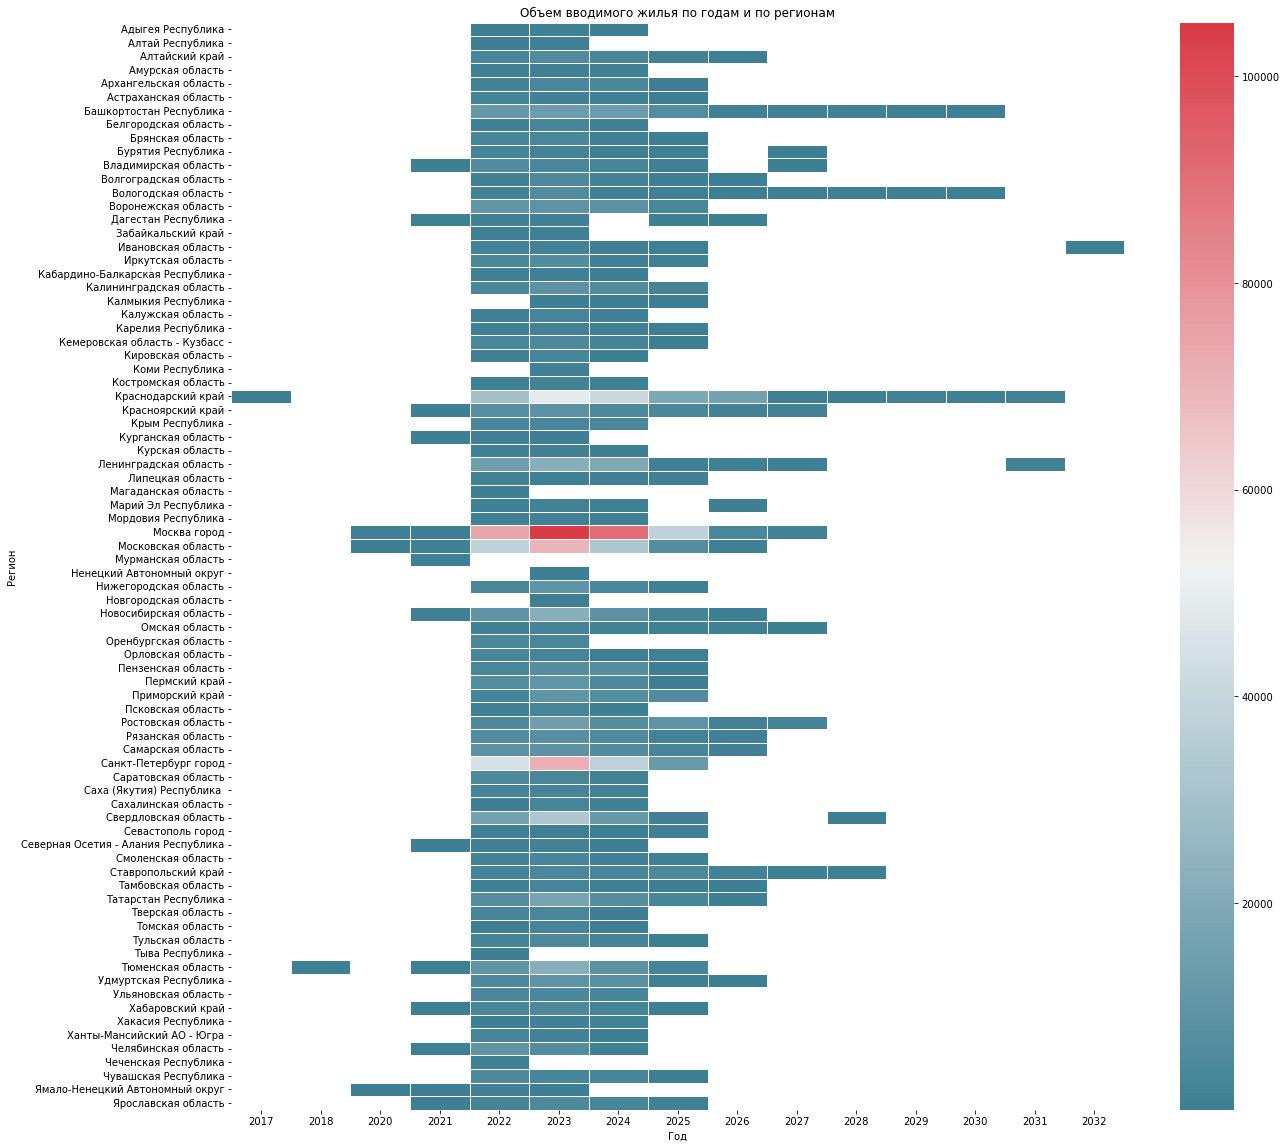

In [62]:
Visualizer(data).make_heatmap()